<a href="https://colab.research.google.com/github/Aristya14/Generasi-Gigih-2/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [ ]:
covid = pd.read_csv("/content/Covid2020.csv")

In [ ]:
covid = pd.read_csv("/content/Covid2020.csv", on_bad_lines="skip", sep=";", header=0)

In [ ]:
covid.head()

,province,region_id,island,total_case,total_death,total_recovered,population,total_city,total_district,total_urban_village,total_rural_village,case_fatality_rate,case_recovered_rate,year
0,Aceh,ACE,Sumatera,8746,358,7139,5247257,5,289,0,64970,9.09,90.00,2020
1,Bali,BAL,Nusa Tenggara,17593,516,16147,4216171,1,57,800,6360,9.52,92.85,2020
2,Banten,BAN,Jawa,18154,525,15656,10722374,4,155,3130,12380,9.72,99.65,2020
3,Bengkulu,BEN,Sumatera,3603,112,2556,1999539,1,129,1720,13410,9.88,83.46,2020
4,DI Yogyakarta,DI,Jawa,12155,259,8176,3631015,1,78,460,3920,9.86,88.32,2020


In [ ]:
covid.dtypes

province                object
region_id               object
island                  object
total_case               int64
total_death              int64
total_recovered          int64
population               int64
total_city               int64
total_district           int64
total_urban_village      int64
total_rural_village      int64
case_fatality_rate     float64
case_recovered_rate    float64
year                     int64
dtype: object

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   province             34 non-null     object 
 1   region_id            34 non-null     object 
 2   island               34 non-null     object 
 3   total_case           34 non-null     int64  
 4   total_death          34 non-null     int64  
 5   total_recovered      34 non-null     int64  
 6   population           34 non-null     int64  
 7   total_city           34 non-null     int64  
 8   total_district       34 non-null     int64  
 9   total_urban_village  34 non-null     int64  
 10  total_rural_village  34 non-null     int64  
 11  case_fatality_rate   34 non-null     float64
 12  case_recovered_rate  34 non-null     float64
 13  year                 34 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 3.8+ KB


In [ ]:
covid = covid.astype({"province":'str', "region_id":'str',"island":"str"})

In [ ]:
covid.isna().sum()

province               0
region_id              0
island                 0
total_case             0
total_death            0
total_recovered        0
population             0
total_city             0
total_district         0
total_urban_village    0
total_rural_village    0
case_fatality_rate     0
case_recovered_rate    0
year                   0
dtype: int64

In [ ]:
employment = pd.read_csv("/content/Unemployment2020.csv")
employment = pd.read_csv("/content/Unemployment2020.csv", on_bad_lines="skip", sep=";", header=0)

In [ ]:
employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   province          34 non-null     object 
 1   region_id         34 non-null     object 
 2   year              34 non-null     int64  
 3   unemployed_rate   34 non-null     float64
 4   unemployed_man    34 non-null     float64
 5   unemployed_woman  34 non-null     float64
 6   dip_grads_man     34 non-null     int64  
 7   uni_grads_man     34 non-null     int64  
 8   smk_grads_man     34 non-null     int64  
 9   sma_grads_man     34 non-null     int64  
 10  dip_grads_woman   34 non-null     int64  
 11  uni_grads_woman   34 non-null     int64  
 12  smk_grads_woman   34 non-null     int64  
 13  sma_grads_woman   34 non-null     int64  
 14  dip_emp_man       34 non-null     int64  
 15  uni_emp_man       34 non-null     int64  
 16  smk_emp_man       34 non-null     int64  
 17 

In [ ]:
employment.isna().sum()

province            0
region_id           0
year                0
unemployed_rate     0
unemployed_man      0
unemployed_woman    0
dip_grads_man       0
uni_grads_man       0
smk_grads_man       0
sma_grads_man       0
dip_grads_woman     0
uni_grads_woman     0
smk_grads_woman     0
sma_grads_woman     0
dip_emp_man         0
uni_emp_man         0
smk_emp_man         0
sma_emp_man         0
dip_emp_woman       0
uni_emp_woman       0
smk_emp_woman       0
sma_emp_woman       0
dtype: int64

In [ ]:
df = pd.merge(employment, covid, on=["region_id","year","province"])

The datasets already compiled using "Inner Join" my matching both region_id, year and province

In [ ]:
df.head()

,province,region_id,year,unemployed_rate,unemployed_man,unemployed_woman,dip_grads_man,uni_grads_man,smk_grads_man,sma_grads_man,...,total_case,total_death,total_recovered,population,total_city,total_district,total_urban_village,total_rural_village,case_fatality_rate,case_recovered_rate
0,Aceh,ACE,2020,6.59,6.06,7.47,1881,8265,10213,18865,...,8746,358,7139,5247257,5,289,0,64970,9.09,90.00
1,Bali,BAL,2020,5.63,6.73,4.31,1923,9344,18745,14416,...,17593,516,16147,4216171,1,57,800,6360,9.52,92.85
2,Banten,BAN,2020,10.64,10.60,10.71,4340,31153,43268,27078,...,18154,525,15656,10722374,4,155,3130,12380,9.72,99.65
3,Bengkulu,BEN,2020,4.07,4.10,4.03,457,3271,4391,7125,...,3603,112,2556,1999539,1,129,1720,13410,9.88,83.46
4,DKI Jakarta,DKI,2020,10.95,11.06,10.76,16215,50521,37139,26265,...,183734,3270,164706,10846145,5,44,2670,0,9.98,95.74


In [ ]:
df = df.drop(columns="year")

In [ ]:
df["total_grads"] = df["dip_grads_man"] + df["uni_grads_man"] + df["smk_grads_man"] + df["sma_grads_man"] + df["dip_grads_woman"] + df["uni_grads_woman"] + df["smk_grads_woman"] + df["sma_grads_woman"]
df["total_emp"] = df["dip_emp_man"] + df["uni_emp_man"] + df["smk_emp_man"] + df["sma_emp_man"] + df["dip_emp_woman"] + df["uni_emp_woman"] + df["smk_emp_woman"] + df["sma_emp_woman"]
df["total_dip_grads"] = df["dip_grads_man"] + df["dip_grads_woman"]
df["total_uni_grads"] = df["uni_grads_man"] + df["uni_grads_woman"]
df["total_smk_grads"] = df["smk_grads_man"] + df["smk_grads_woman"]
df["total_sma_grads"] = df["sma_grads_man"] + df["sma_grads_woman"]
df["total_unemployed"] = df["unemployed_rate"]*df["population"]

In [ ]:
df.shape

(33, 39)

Dataset comprises of 33 observations and 35 characteristics.

In [ ]:
print("count = ",df.unemployed_rate.count())
print("min = ",df.unemployed_rate.min())
print("max = ",df.unemployed_rate.max())
print("quantile 25% = ",df.unemployed_rate.quantile(.25))
print("quantile 50% = ",df.unemployed_rate.quantile(.50))
print("qantile 75% = ",df.unemployed_rate.quantile(.75))
print("mean = ",df.unemployed_rate.mean())
print("median = ",df.unemployed_rate.median())
print("mode = ",df.unemployed_rate.mode())


count =  33
min =  3.32
max =  10.95
quantile 25% =  4.58
quantile 50% =  5.63
qantile 75% =  6.87
mean =  6.077878787878788
median =  5.63
mode =  0    4.28
dtype: float64


In [ ]:
df.unemployed_rate.std()

2.027405604423665

Identify unemployment rate spread : Standard Deviation

In [ ]:
from scipy.stats import kurtosis, skew
print(skew(df.unemployed_rate, bias=False))
print(kurtosis(df.unemployed_rate, bias=False))

1.192974089886409
0.8728338909641433


In [ ]:
print(df.unemployed_rate.skew())
print(df.unemployed_rate.kurt())

1.192974089886409
0.8728338909641438


Normality Test : Skewness & Kurt
Dikarenakan nilai **skewness > 1** maka dapat disimpulkan bahwa kebanyakan unemployed_rate  cenderung memiliki nilai rendah

Dikarenakan nilai **kurt > 1 **dapat diketahui bahwa kebanyakan nilai memiliki kluster yang sama sehingga data kurang menyebar

In [ ]:
df.corr()

,unemployed_rate,unemployed_man,unemployed_woman,dip_grads_man,uni_grads_man,smk_grads_man,sma_grads_man,dip_grads_woman,uni_grads_woman,smk_grads_woman,...,total_rural_village,case_fatality_rate,case_recovered_rate,total_grads,total_emp,total_dip_grads,total_uni_grads,total_smk_grads,total_sma_grads,total_unemployed
unemployed_rate,1.000000,0.982907,0.957958,0.573708,0.537279,0.393276,0.383469,0.506567,0.573775,0.422684,...,0.024371,0.069685,0.329621,0.460420,0.465074,0.536142,0.561632,0.405921,0.387395,0.512098
unemployed_man,0.982907,1.000000,0.889347,0.602615,0.564488,0.435387,0.406428,0.532475,0.592597,0.462001,...,0.045956,0.111294,0.299878,0.493397,0.498815,0.563390,0.584144,0.446866,0.413312,0.540226
unemployed_woman,0.957958,0.889347,1.000000,0.492578,0.462599,0.303380,0.323626,0.435285,0.510516,0.335111,...,-0.007721,0.005917,0.352074,0.380557,0.383311,0.460540,0.493124,0.316969,0.322053,0.433620
dip_grads_man,0.573708,0.602615,0.492578,1.000000,0.951522,0.845736,0.810886,0.975698,0.903959,0.859045,...,0.492104,0.361886,0.228694,0.901959,0.890342,0.991041,0.929644,0.851760,0.821546,0.861825
uni_grads_man,0.537279,0.564488,0.462599,0.951522,1.000000,0.863009,0.874498,0.945767,0.975774,0.870166,...,0.539300,0.251674,0.240066,0.935317,0.927146,0.953584,0.991933,0.866433,0.872133,0.869090
smk_grads_man,0.393276,0.435387,0.303380,0.845736,0.863009,1.000000,0.922125,0.883423,0.843013,0.998151,...,0.694829,0.505343,0.184471,0.979648,0.980365,0.873658,0.856575,0.999668,0.944210,0.965248
sma_grads_man,0.383469,0.406428,0.323626,0.810886,0.874498,0.922125,1.000000,0.865681,0.850117,0.924100,...,0.703858,0.263138,0.110050,0.960094,0.960411,0.849031,0.865592,0.923379,0.994408,0.923724
dip_grads_woman,0.506567,0.532475,0.435285,0.975698,0.945767,0.883423,0.865681,1.000000,0.911272,0.888594,...,0.613910,0.451433,0.228972,0.935078,0.918167,0.996222,0.931427,0.886014,0.880206,0.868575
uni_grads_woman,0.573775,0.592597,0.510516,0.903959,0.975774,0.843013,0.850117,0.911272,1.000000,0.849118,...,0.530861,0.304377,0.272207,0.918137,0.900186,0.913708,0.995636,0.845982,0.850391,0.840120
smk_grads_woman,0.422684,0.462001,0.335111,0.859045,0.870166,0.998151,0.924100,0.888594,0.849118,1.000000,...,0.670522,0.483275,0.188689,0.981773,0.983165,0.882084,0.863165,0.999386,0.944825,0.976582


As for our numeric to numeric analysis, we are gonna tag **unemployed_rate** as our dependent variable vs **total_case**, **total_deaths** and **total_grads** as our independent variables     

In [ ]:
from scipy import stats

corr_df = pd.DataFrame(columns=['r','p'])

for col in df:
  if pd.api.types.is_numeric_dtype(df[col]) and col != 'unemployed_rate':
    r,p = stats.pearsonr(df.unemployed_rate, df[col])
    corr_df.loc[col] = [round(r,3), round(p,3)]

In [ ]:
corr_df

,r,p
unemployed_rate,0.512,0.002
unemployed_man,0.540,0.001
unemployed_woman,0.434,0.012
dip_grads_man,0.862,0.000
uni_grads_man,0.869,0.000
smk_grads_man,0.965,0.000
sma_grads_man,0.924,0.000
dip_grads_woman,0.869,0.000
uni_grads_woman,0.840,0.000
smk_grads_woman,0.977,0.000


LinregressResult(slope=5.368048450959412e-06, intercept=5.375698522136522, rvalue=0.46042019227938014, pvalue=0.007012872590059337, stderr=1.8588655434681851e-06)
726609
10236


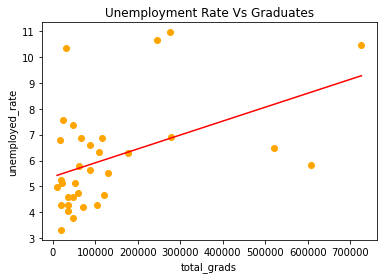

In [ ]:
print(stats.linregress(df.total_grads, df.unemployed_rate))
print(df.total_grads.max())
print(df.total_grads.min())

m, b, r, p, err = stats.linregress(df.total_grads, df.unemployed_rate)

x = range(df.total_grads.min(), df.total_grads.max())
y = m * x + b

plt.plot(x, y, color = 'red')
plt.scatter(df.total_grads, df.unemployed_rate, color = 'orange')
plt.title('Unemployment Rate Vs Graduates')
plt.xlabel('total_grads')
plt.ylabel('unemployed_rate')
plt.show()

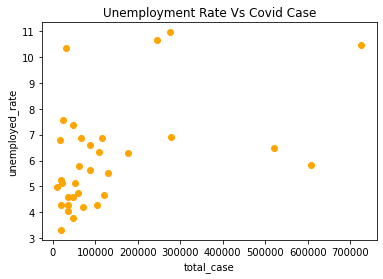

In [ ]:
plt.scatter(df.total_grads, df.unemployed_rate, color='orange')
plt.title('Unemployment Rate Vs Covid Case')
plt.xlabel('total_case')
plt.ylabel('unemployed_rate')
plt.show()

No handles with labels found to put in legend.


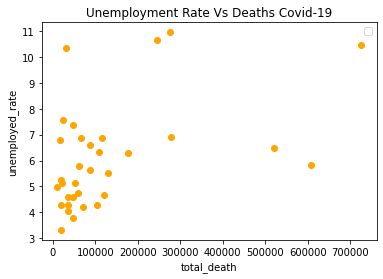

In [ ]:
plt.scatter(df.total_grads, df.unemployed_rate, color='orange')
plt.title('Unemployment Rate Vs Deaths Covid-19')
plt.xlabel('total_death')
plt.ylabel('unemployed_rate')
plt.legend()
plt.show()

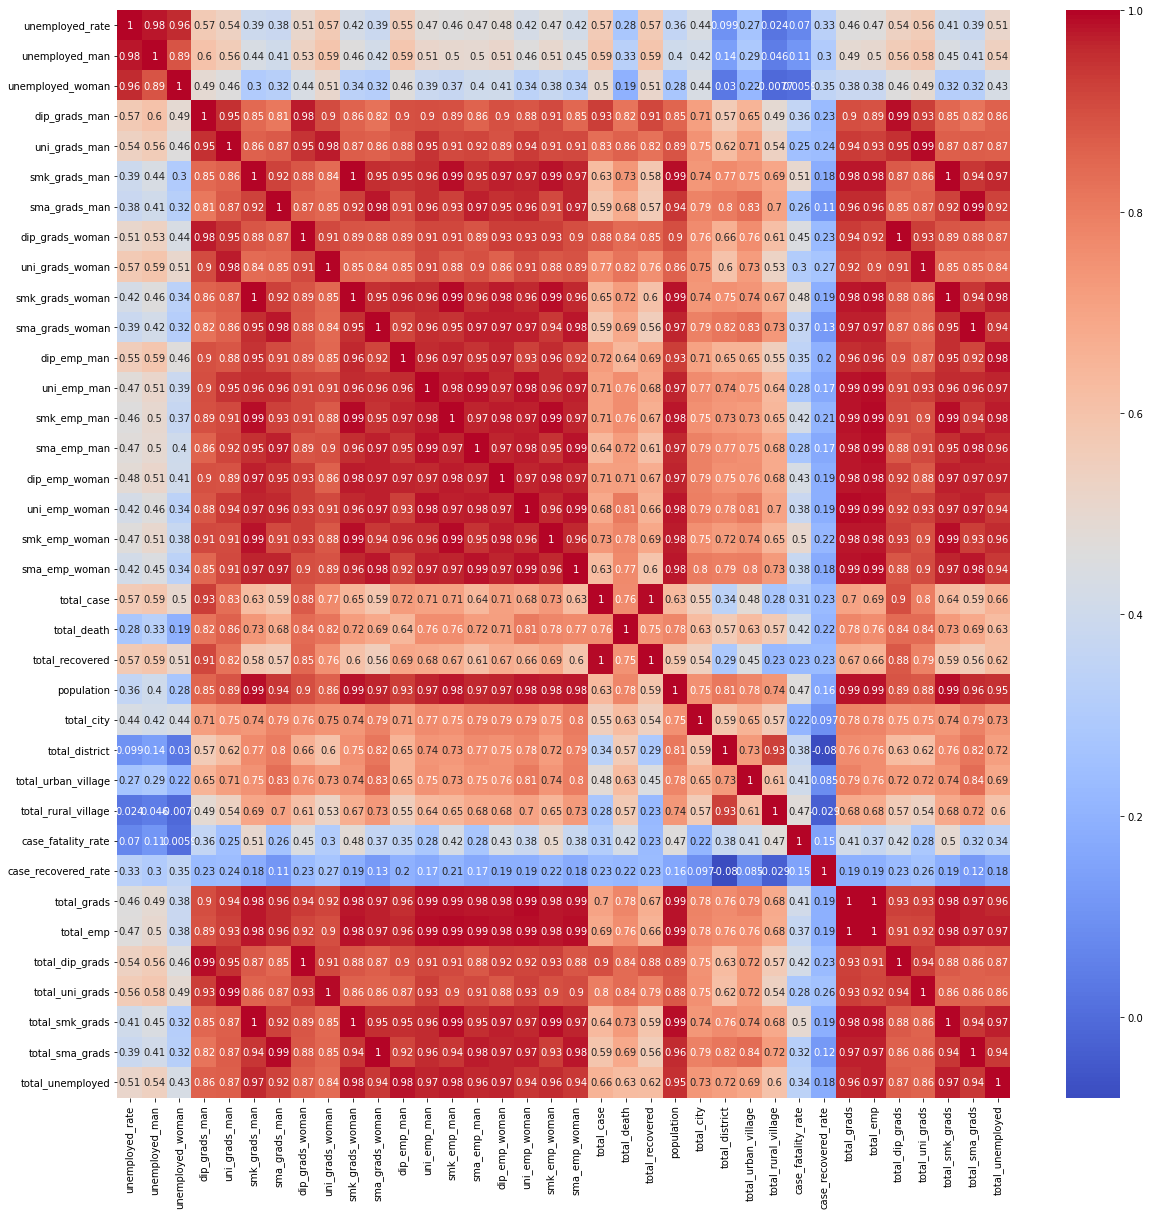

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
df2 = df[['unemployed_rate', 'total_case', 'total_grads', 'total_death']]

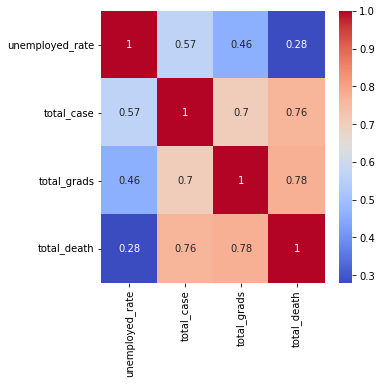

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')